# Rf 8 0 1_Mcstudy

Validation and MC studies: toy Monte Carlo study that perform cycles of event generation and fitting




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:04 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create model
-----------------------

Declare observable x

In [2]:
x = ROOT.RooRealVar("x", "x", 0, 10)
x.setBins(40)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create two Gaussian PDFs g1(x,mean1,sigma) anf g2(x,mean2,sigma) and
their parameters

In [3]:
mean = ROOT.RooRealVar("mean", "mean of gaussians", 5, 0, 10)
sigma1 = ROOT.RooRealVar("sigma1", "width of gaussians", 0.5)
sigma2 = ROOT.RooRealVar("sigma2", "width of gaussians", 1)

sig1 = ROOT.RooGaussian("sig1", "Signal component 1", x, mean, sigma1)
sig2 = ROOT.RooGaussian("sig2", "Signal component 2", x, mean, sigma2)

Build Chebychev polynomial p.d.f.

In [4]:
a0 = ROOT.RooRealVar("a0", "a0", 0.5, 0., 1.)
a1 = ROOT.RooRealVar("a1", "a1", -0.2, -1, 1.)
bkg = ROOT.RooChebychev("bkg", "Background", x, ROOT.RooArgList(a0, a1))

Sum the signal components into a composite signal p.d.f.

In [5]:
sig1frac = ROOT.RooRealVar(
    "sig1frac", "fraction of component 1 in signal", 0.8, 0., 1.)
sig = ROOT.RooAddPdf(
    "sig", "Signal", ROOT.RooArgList(sig1, sig2), ROOT.RooArgList(sig1frac))

Sum the composite signal and background

In [6]:
nbkg = ROOT.RooRealVar(
    "nbkg", "number of background events, ", 150, 0, 1000)
nsig = ROOT.RooRealVar("nsig", "number of signal events", 150, 0, 1000)
model = ROOT.RooAddPdf(
    "model", "g1+g2+a", ROOT.RooArgList(bkg, sig), ROOT.RooArgList(nbkg, nsig))

Create manager
---------------------------

Instantiate ROOT.RooMCStudy manager on model with x as observable and given choice of fit options

The Silence() option kills all messages below the PROGRESS level, only a single message
per sample executed, any error message that occur during fitting

The Extended() option has two effects:
   1) The extended ML term is included in the likelihood and
   2) A poisson fluctuation is introduced on the number of generated events

The FitOptions() given here are passed to the fitting stage of each toy experiment.
If Save() is specified, fit result of each experiment is saved by the manager

A Binned() option is added in self example to bin the data between generation and fitting
to speed up the study at the expemse of some precision

In [7]:
mcstudy = ROOT.RooMCStudy(
    model,
    ROOT.RooArgSet(x),
    ROOT.RooFit.Binned(
        ROOT.kTRUE),
    ROOT.RooFit.Silence(),
    ROOT.RooFit.Extended(),
    ROOT.RooFit.FitOptions(
        ROOT.RooFit.Save(
            ROOT.kTRUE),
        ROOT.RooFit.PrintEvalErrors(0)))

Generate and fit events
---------------------------------------------

Generate and fit 1000 samples of Poisson(nExpected) events

In [8]:
mcstudy.generateAndFit(1000)

False

[#0] PROGRESS:Generation -- RooMCStudy::run: sample 990
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 980
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 970
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 960
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 950
[#0] WARNING:Minization -- RooMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (-797.721) to force MIGRAD to back out of this region. Error log follows
Parameter values: a0=0.716236, a1=-0.675686, mean=5.04367, nbkg=115.661, nsig=155.327, sig1frac=0.880121
RooChebychev::bkg[ x=x coefList=(a0,a1) ] has 1 errors

[#0] PROGRESS:Generation -- RooMCStudy::run: sample 940
[#0] PROGRESS:Generation -- RooMCStudy::run: sample 930
[#0] WARNING:Minization -- RooMinimizerFcn: Minimized function has error status.
Returning maximum FCN so far (-867.289) to force MIGRAD to back out of this region. Error log follows
Parameter values: a0=0.907715, a1=-0.26012, mean=4.95881, nbkg=147.451, nsig=156.

Explore results of study
------------------------------------------------

Make plots of the distributions of mean, error on mean and the pull of
mean

In [9]:
frame1 = mcstudy.plotParam(mean, ROOT.RooFit.Bins(40))
frame2 = mcstudy.plotError(mean, ROOT.RooFit.Bins(40))
frame3 = mcstudy.plotPull(mean, ROOT.RooFit.Bins(
    40), ROOT.RooFit.FitGauss(ROOT.kTRUE))


[#1] INFO:NumericIntegration -- RooRealIntegral::init(pullGauss_Int[meanpull]) using numeric integrator RooIntegrator1D to calculate Int(meanpull)
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization -- RooMinimizer::optimizeConst: deactivating const optimization
[#1] INFO:NumericIntegration -- RooRealIntegral::init(pullGauss_Int[meanpull]) using numeric integrator RooIntegrator1D to calculate Int(meanpull)


Plot distribution of minimized likelihood

In [10]:
frame4 = mcstudy.plotNLL(ROOT.RooFit.Bins(40))

Make some histograms from the parameter dataset

In [11]:
hh_cor_a0_s1f = ROOT.RooAbsData.createHistogram(
    mcstudy.fitParDataSet(), "hh", a1, ROOT.RooFit.YVar(sig1frac))
hh_cor_a0_a1 = ROOT.RooAbsData.createHistogram(mcstudy.fitParDataSet(),
                                               "hh", a0, ROOT.RooFit.YVar(a1))

Access some of the saved fit results from individual toys

In [12]:
corrHist000 = mcstudy.fitResult(0).correlationHist("c000")
corrHist127 = mcstudy.fitResult(127).correlationHist("c127")
corrHist953 = mcstudy.fitResult(953).correlationHist("c953")

Draw all plots on a canvas

In [13]:
ROOT.gStyle.SetPalette(1)
ROOT.gStyle.SetOptStat(0)
c = ROOT.TCanvas("rf801_mcstudy", "rf801_mcstudy", 900, 900)
c.Divide(3, 3)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
frame1.GetYaxis().SetTitleOffset(1.4)
frame1.Draw()
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame2.GetYaxis().SetTitleOffset(1.4)
frame2.Draw()
c.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
frame3.GetYaxis().SetTitleOffset(1.4)
frame3.Draw()
c.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
frame4.GetYaxis().SetTitleOffset(1.4)
frame4.Draw()
c.cd(5)
ROOT.gPad.SetLeftMargin(0.15)
hh_cor_a0_s1f.GetYaxis().SetTitleOffset(1.4)
hh_cor_a0_s1f.Draw("box")
c.cd(6)
ROOT.gPad.SetLeftMargin(0.15)
hh_cor_a0_a1.GetYaxis().SetTitleOffset(1.4)
hh_cor_a0_a1.Draw("box")
c.cd(7)
ROOT.gPad.SetLeftMargin(0.15)
corrHist000.GetYaxis().SetTitleOffset(1.4)
corrHist000.Draw("colz")
c.cd(8)
ROOT.gPad.SetLeftMargin(0.15)
corrHist127.GetYaxis().SetTitleOffset(1.4)
corrHist127.Draw("colz")
c.cd(9)
ROOT.gPad.SetLeftMargin(0.15)
corrHist953.GetYaxis().SetTitleOffset(1.4)
corrHist953.Draw("colz")

c.SaveAs("rf801_mcstudy.png")

Info in <TCanvas::Print>: png file rf801_mcstudy.png has been created


Make ROOT.RooMCStudy object available on command line after
macro finishes

In [14]:
ROOT.gDirectory.Add(mcstudy)

Draw all canvases 

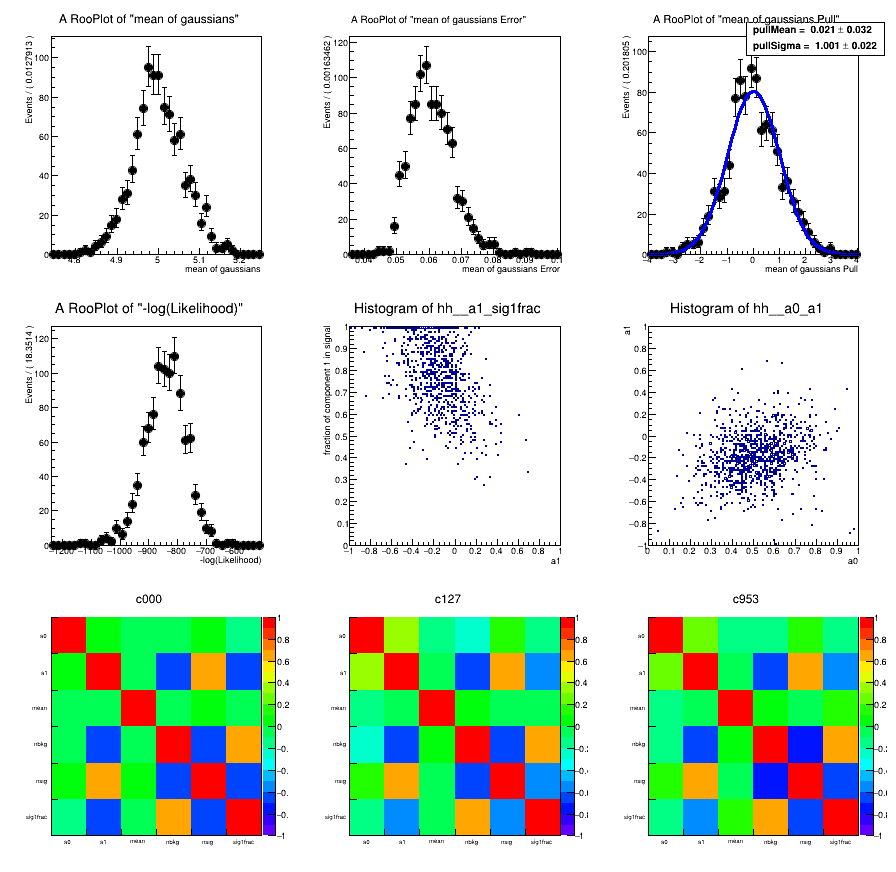

In [15]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()